# Einstein Rosen waves and the self similarity hypothesis in cylindrical symmetry by Harada Nakao and Nolan
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021  Christmas Eve!

Einstein Tensor for Metric 2.2 needs to set equal to a yet to be defined stress energy tensor.  Here we concentrate on the metric given as equation 2.13 and find the vacuum field equations for this metric.  Constants of integration for separation of variables have been arbitrarily picked.  Will go back and fix these later

https://arxiv.org/abs/0812.3462

Below is a very helpful link for working with Bessel functions

https://sudonull.com/post/31698-Bessel-Functions-in-SymPy-Symbolic-Math-Program

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
k,x,u,v,phi,z,du,dv,dphi,dz,dt,dx = symbols('k x u v phi z du dv dphi dz dt dx')

In [5]:
gamma, psi,r = symbols('gamma psi r')

In [6]:
gamma = Function('gamma')(t,x)
gamma

In [7]:
psi = Function('psi')(t,x)
psi

In [8]:
variables = Matrix( [t,x,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [dt,dx,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [10]:
lineElement = expand(exp(2*(gamma-psi))*( - dt**2 + dx**2 ) + exp(-2*psi)*x**2*dphi**2 + exp(2*psi)*dz**2) 
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, x)  -2⋅ψ(t, x)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, x)  -2⋅ψ(t, x)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, x)            ⎥
⎢           0                       0             x ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, x)⎥
⎣           0                       0                   0         ℯ         ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, x)  -2⋅ψ(t, x)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, x)  -2⋅ψ(t, x)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, x)            ⎥
⎢           0                       0             x ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, x)⎥
⎣           0                       0                   0         ℯ         ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t x phi z")
t,x,phi,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                                            ⎤  ⎡∂            
⎢⎢──(γ(t, x)) - ──(ψ(t, x))  ──(γ(t, x)) - ──(ψ(t, x))               0                                0                 ⎥  ⎢──(γ(t, x)) -
⎢⎢∂t            ∂t           ∂x            ∂x                                                                           ⎥  ⎢∂x           
⎢⎢                                                                                                                      ⎥  ⎢             
⎢⎢∂             ∂            ∂             ∂                                                                            ⎥  ⎢∂            
⎢⎢──(γ(t, x)) - ──(ψ(t, x))  ──(γ(t, x)) - ──(ψ(t, x))               0                                0                 ⎥  ⎢──(γ(t, x)) -
⎢⎢∂x            ∂x           ∂t            ∂t                                                                           ⎥  ⎢∂t           
⎢⎢                                

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                           2     2              2         ⎞                                                      
⎢  ⎜   ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                                    
⎢x⋅⎜- ───(γ(t, x)) + ───(γ(t, x)) - 2⋅⎜──(ψ(t, x))⎟  + ───(ψ(t, x)) - ───(ψ(t, x))⎟ + ──(γ(t, x)) - ──(ψ(t, x))                          
⎢  ⎜    2              2              ⎝∂t         ⎠      2              2         ⎟   ∂x            ∂x                                   
⎢  ⎝  ∂t             ∂x                                ∂t             ∂x          ⎠                                                      
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────                          
⎢                                                      x                                                                                 
⎢                                 

In [19]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂                                               
⎢               2                2   1.0⋅──(γ(t, x))                                     ──(γ(t, x))                                     
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂x                    ∂           ∂             ∂t                                              
⎢- ⎜──(ψ(t, x))⎟  - ⎜──(ψ(t, x))⎟  + ───────────────       - 2⋅──(ψ(t, x))⋅──(ψ(t, x)) + ───────────                                     
⎢  ⎝∂t         ⎠    ⎝∂x         ⎠           x                  ∂t          ∂x                 x                                          
⎢                                                                                                                                        
⎢                                   ∂                                                         ∂                                          
⎢                                 

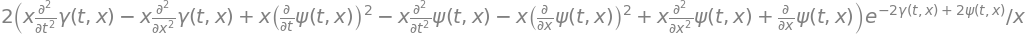

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

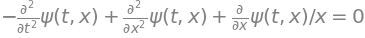

In [23]:
equation2pt14 = Eq(expand((1/x)*Ric.tensor()[2,2].args[1]),0)
equation2pt14

In [24]:
equation2pt15 = Eq(diff(gamma,x),solve( simplify(einst.tensor())[0,0] , diff(gamma,x))[0])
equation2pt15

In [25]:
equation2pt16 = Eq(diff(gamma,t),solve( Ric.tensor()[1,0] , diff(gamma,t) )[0] )
equation2pt16

In [26]:
vacuumFieldEquations = Matrix([equation2pt14,equation2pt15,equation2pt16])
vacuumFieldEquations

/opt/anaconda3/lib/python3.8/site-packages/sympy/matrices/repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(


⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(t, x))     ⎥
⎢    ∂              ∂             ∂x              ⎥
⎢ - ───(ψ(t, x)) + ───(ψ(t, x)) + ─────────── = 0 ⎥
⎢     2              2                 x          ⎥
⎢   ∂t             ∂x                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, x)) = x⋅⎜⎜──(ψ(t, x))⎟  + ⎜──(ψ(t, x))⎟ ⎟⎥
⎢∂x              ⎝⎝∂t         ⎠    ⎝∂x         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(t, x)) = 2⋅x⋅──(ψ(t, x))⋅──(ψ(t, x))    ⎥
⎣    ∂t                ∂t          ∂x             ⎦

In [27]:
from sympy import Function, Eq, pde_separate_mul, Derivative as D

In [28]:
u, X, Y = map(Function, 'uXY')

In [29]:
psi

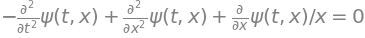

In [30]:
eq = vacuumFieldEquations[0]
eq

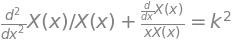

In [31]:
xODE = Eq(pde_separate( eq, psi, [X(x),Y(t)])[0] , k**2 ) 
xODE

In [32]:
from sympy import dsolve 

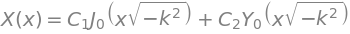

In [33]:
xSolution = dsolve( xODE , X(x))
xSolution 

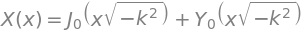

In [53]:
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

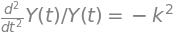

In [34]:
yODE = Eq( pde_separate( eq, psi, [X(x),Y(t)])[1] , - k**2 ) 
yODE

In [35]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [55]:
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

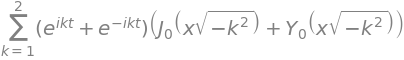

In [61]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [73]:
psiSumTwoTerms = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [63]:
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 

In [67]:
#  Change the complex exponentials to sin and cos 
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ).rewrite(cos)

In [72]:
#  Figure out how to rewrite bessel functions 
#  expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ).rewrite(cos).rewrite(jn)

In [81]:
dgammadxPDE = vacuumFieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadxPDE

In [82]:
#  pdsolve( dgammadxPDE )

In [83]:
dgammadtPDE = vacuumFieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadtPDE

In [ ]:
#  pdsolve( dgammadxPDE )